## Pizza Place Sales

Step 1: Import the libraries we will use

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Step 2: Load the CSV files into pandas DataFrames

In [13]:
# Load the CSV files
orders = pd.read_csv(r"C:\Users\Saka Adebola\Downloads\orders.csv", encoding="latin1")
order_details = pd.read_csv(r"C:\Users\Saka Adebola\Downloads\order_details.csv", encoding="latin1")
pizzas = pd.read_csv(r"C:\Users\Saka Adebola\Downloads\pizzas.csv", encoding="latin1")
pizza_types = pd.read_csv(r"C:\Users\Saka Adebola\Downloads\pizza_types.csv", encoding="latin1")

Step 3: Join the four files into a single DataFrame

In [14]:
# Merge order_details with pizzas (on pizza_id)
df = pd.merge(order_details, pizzas, on="pizza_id")

# Merge df with pizza_types (on pizza_type_id)
df = pd.merge(df, pizza_types, on="pizza_type_id")

# Merge df with orders (on order_id)
df = pd.merge(df, orders, on="order_id")

# Final dataset
df.head()

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,date,time
0,1,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-01,11:38:36
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",2015-01-01,11:57:40
2,3,2,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",2015-01-01,11:57:40
3,4,2,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",2015-01-01,11:57:40
4,5,2,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2015-01-01,11:57:40


Question 1: What is the total revenue (sales)?

In [15]:
# Create a new column for revenue per row
df["revenue"] = df["price"] * df["quantity"]

# Total revenue
total_revenue = df["revenue"].sum()
print("Total Revenue (₦):", total_revenue)

Total Revenue (₦): 817860.05


Question 2: Total Quantity Sold

In [16]:
total_quantity = df["quantity"].sum()
print("Total Quantity Sold:", total_quantity)

Total Quantity Sold: 49574


Question 3: Total Orders

In [17]:
total_orders = df["order_id"].nunique()
print("Total Orders:", total_orders)

Total Orders: 21350


Question 4: How many pizza types do they sell?

In [18]:
pizza_types_count = df["pizza_type_id"].nunique()
print("Number of Pizza Types:", pizza_types_count)

Number of Pizza Types: 32


Question 5: Average Price of Pizzas

In [19]:
average_price = df[["pizza_id", "price"]].drop_duplicates()["price"].mean()
print("Average Pizza Price (₦):", average_price)

Average Pizza Price (₦): 16.506043956043957


Question 6: What are the peak hours of sales?

hour
9         83.00
10       303.65
11     44935.80
12    111877.90
13    106065.70
14     59201.40
15     52992.30
16     70055.40
17     86237.45
18     89296.85
19     72628.90
20     58215.40
21     42029.80
22     22815.15
23      1121.35
Name: revenue, dtype: float64


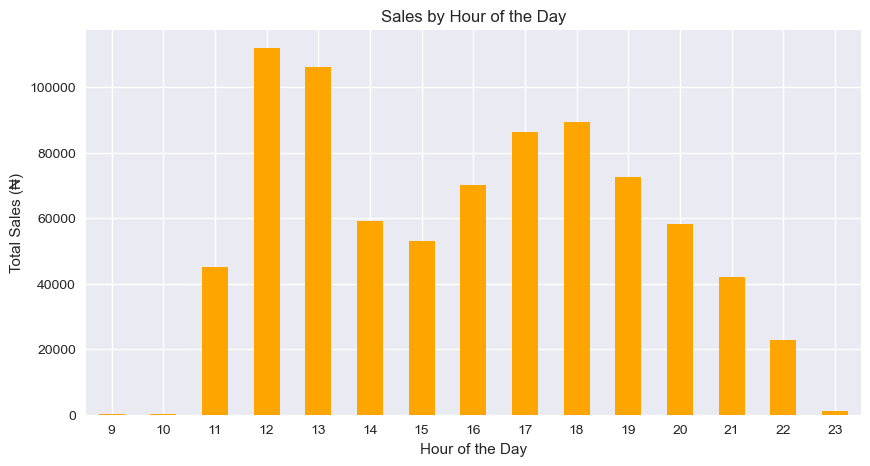

In [20]:
# Convert the time column to datetime (if not already)
df["time"] = pd.to_datetime(df["time"], format="%H:%M:%S")

# Extract the hour
df["hour"] = df["time"].dt.hour

# Group by hour and sum revenue (or count orders)
sales_by_hour = df.groupby("hour")["revenue"].sum()

print(sales_by_hour)

# Plot for visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sales_by_hour.plot(kind="bar", color="orange")
plt.title("Sales by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Total Sales (₦)")
plt.xticks(rotation=0)
plt.show()

Question 7: Find the total sales made on each day of the week, and which day sells the most.

day_of_week
Friday       136073.90
Thursday     123528.50
Saturday     123182.40
Wednesday    114408.40
Tuesday      114133.80
Monday       107329.55
Sunday        99203.50
Name: revenue, dtype: float64


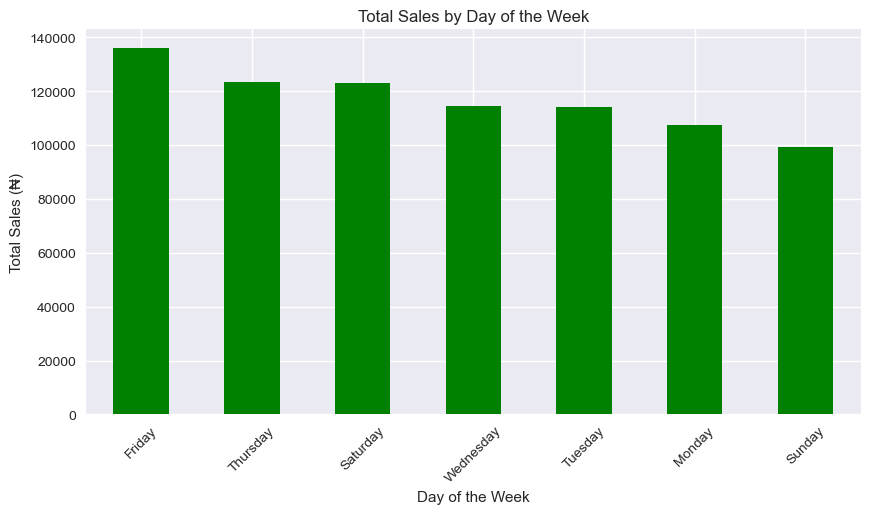

In [21]:
# Convert date column to datetime
df["date"] = pd.to_datetime(df["date"])

# Extract day of the week (0=Monday, 6=Sunday)
df["day_of_week"] = df["date"].dt.day_name()

# Group by day and sum revenue
sales_by_day = df.groupby("day_of_week")["revenue"].sum().sort_values(ascending=False)

print(sales_by_day)

# Plot
plt.figure(figsize=(10,5))
sales_by_day.plot(kind="bar", color="green")
plt.title("Total Sales by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Total Sales (₦)")
plt.xticks(rotation=45)
plt.show()

Question 8: Top 5 Bestselling Pizzas

name
The Classic Deluxe Pizza      2453
The Barbecue Chicken Pizza    2432
The Hawaiian Pizza            2422
The Pepperoni Pizza           2418
The Thai Chicken Pizza        2371
Name: quantity, dtype: int64


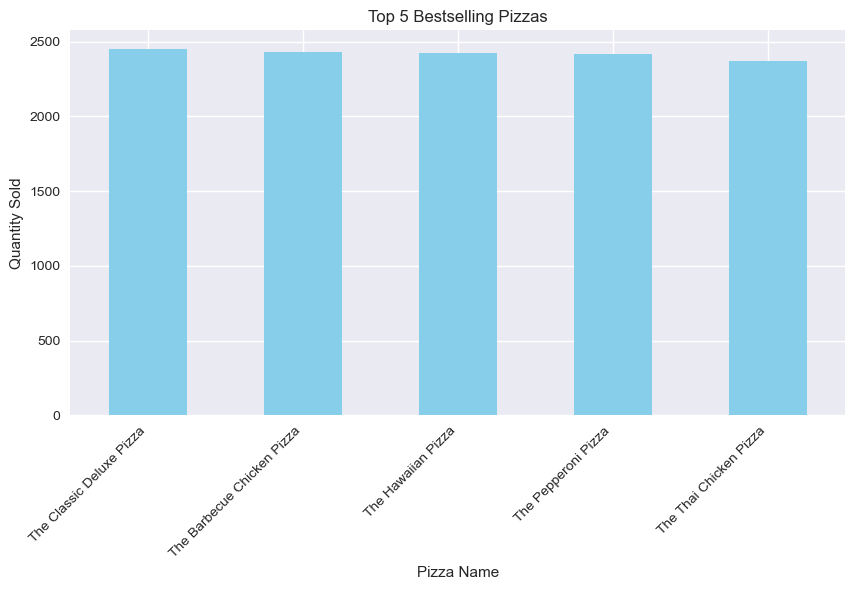

In [22]:
top_pizzas = (
    df.groupby("name")["quantity"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

print(top_pizzas)

# Plot
plt.figure(figsize=(10,5))
top_pizzas.plot(kind="bar", color="skyblue")
plt.title("Top 5 Bestselling Pizzas")
plt.xlabel("Pizza Name")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=45, ha="right")
plt.show()

Question 9: Find the sales made in each month and check for trends.

month
January      69793.30
February     65159.60
March        70397.10
April        68736.80
May          71402.75
June         68230.20
July         72557.90
August       68278.25
September    64180.05
October      64027.60
November     70395.35
December     64701.15
Name: revenue, dtype: float64


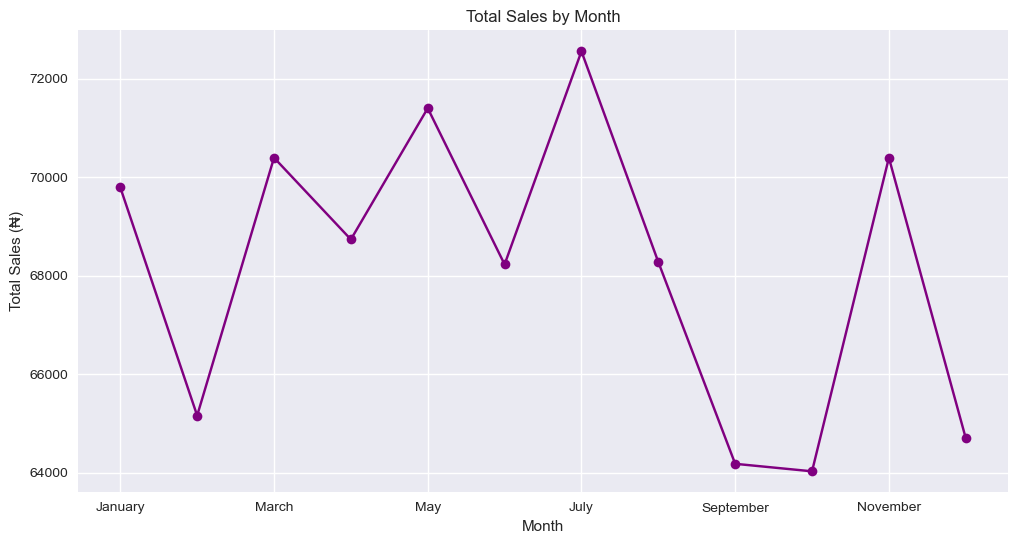

In [23]:
# Extract month name from date
df["month"] = df["date"].dt.month_name()

# Group by month and sum revenue
sales_by_month = df.groupby("month")["revenue"].sum()

# Reorder months properly (not alphabetically)
month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
sales_by_month = sales_by_month.reindex(month_order)

print(sales_by_month)

# Plot
plt.figure(figsize=(12,6))
sales_by_month.plot(kind="line", marker="o", color="purple")
plt.title("Total Sales by Month")
plt.xlabel("Month")
plt.ylabel("Total Sales (₦)")
plt.grid(True)
plt.show()

In [ ]:
Question 10: Are there pizza types that are not doing well on the menu?